In [3]:
#imports
import utils.analysis as analysis
import utils.datautils as datautils
import matplotlib.pyplot as plt
import tifffile as tif
import numpy as np
import pandas as pd
from read_roi import read_roi_zip as col_zip
from read_roi import read_roi_file as col_f
import os
from PIL import Image
import seaborn as sns
from tqdm import tqdm

In [4]:
img_name = '/Users/aichah/Desktop/TLI/data/subtypeA/211104_P36_N2_R270_clahe.tif'
mask_name = '/Users/aichah/Desktop/TLI/data/subtypeA/211104_P36_N2_R270_mask.tif'
entry_point = [0,16,240,240]
shrink_factor = 0.644

In [5]:
image = tif.imread(img_name)
mask = tif.imread(mask_name)
image[mask==0] = 0
image[image!=0] = 1

In [6]:
lifetimes = analysis.cal_lifetimes(image, save=False,  
                                    xy_pixel=0.076, z_pixel=0.4)
stable_neuron = analysis.stable_N(lifetimes, stab_limit=4, save=False, 
                                    xy_pixel=0.076, z_pixel=0.4)

100%|██████████| 88/88 [00:06<00:00, 13.21it/s]


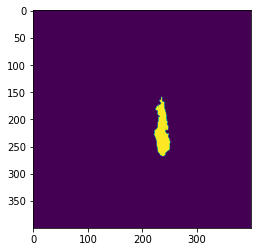

In [7]:
plt.imshow(stable_neuron[3,20,:,:])

In [18]:
image_coor = np.argwhere(stable_neuron)

In [7]:
image_coor = image_coor - entry_point

In [8]:
# image_coor1 = image_coor[:,1:]/np.linalg.norm(image_coor[:,1:],axis=0)

In [15]:
# dot_product = np.dot(image_coor1, (0,1,0))
# angles = np.arccos(dot_product)
# angles = np.degrees(angles).round()
# angles = angles.reshape(angles.shape[0],1)

<ipython-input-15-6ba57fe449a4>:2: RuntimeWarning: invalid value encountered in arccos
  angles = np.arccos(dot_product)


In [8]:
new_px = np.diff(stable_neuron,axis=0)
# new_px.shape, new_px.min(), new_px.max()

In [11]:
# new_stable = new_px.copy()
# new_stable[new_stable<0] = 0
# new_retracted = new_px.copy()
# new_retracted[new_retracted>0] = 0
# new_retracted[new_retracted<0] = 1

In [9]:
stable_coor = np.argwhere(new_px==1)
retracted_coor = np.argwhere(new_px==-1)
stable_coor.shape, retracted_coor.shape

((819983, 4), (624704, 4))

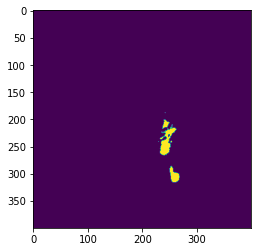

In [13]:
plt.imshow(stable_neuron[20,20])

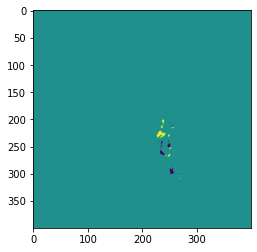

In [15]:
plt.imshow(new_px[20,20])

In [16]:
np.argwhere(new_px[20,20]==-1).shape , np.argwhere(new_px[20,20]==1).shape

((188, 2), (207, 2))

In [99]:
# new_px1 = stable_neuron.copy()
# for ind in np.arange(4,89):
#     # print(ind)
#     new_px1[ind][stable_neuron[ind-1] ==1] = 0
#     # print(stable_neuron[ind].sum(),new_px1[ind].sum(),new_px[ind].sum())

In [79]:
# (new_px[-1] == new_px1[-1]).all()

False

In [26]:
image_coor = retracted_coor - entry_point

In [27]:
angles_tan = np.round(np.rad2deg(np.arctan2(image_coor[:,2], image_coor[:,3])))
# angles_tan += 180
angles_tan = angles_tan.reshape(angles_tan.shape[0],1)

In [28]:
angles_tan.min()

-178.0

In [29]:
image_coor = np.hstack((image_coor,angles_tan))

In [12]:
# for ind, pn in tqdm(enumerate(image_coor)):
#     if pn[2] < 0:
#         new_pn = pn.copy()
#         new_pn[-1] = 360 - pn[-1]
#         image_coor[ind] = new_pn

11895165it [00:17, 698013.14it/s]


In [30]:
image_coor

array([[  3.,  -3.,   5.,  -3., 121.],
       [  3.,  -3.,   5.,  -2., 112.],
       [  3.,  -3.,   6.,  -3., 117.],
       ...,
       [ 87.,  33., -57.,  35., -58.],
       [ 87.,  33., -57.,  36., -58.],
       [ 87.,  33., -56.,  36., -57.]])

In [31]:
start, end = image_coor[:,0].min(), image_coor[:,0].max()
neuron1_angles = pd.DataFrame()
neuron1_angles['angles'] = np.linspace(-180,180,361)
neuron1_angles = neuron1_angles.set_index('angles')
for i in tqdm(np.arange(start,end+1)):
    timepoint_angles = image_coor[image_coor[:,0] == i][:,-1]
    angles = np.histogram(timepoint_angles, bins=np.linspace(-180,181,362))
    neuron1_angles[i] = angles[0]

100%|██████████| 85/85 [00:00<00:00, 355.36it/s]


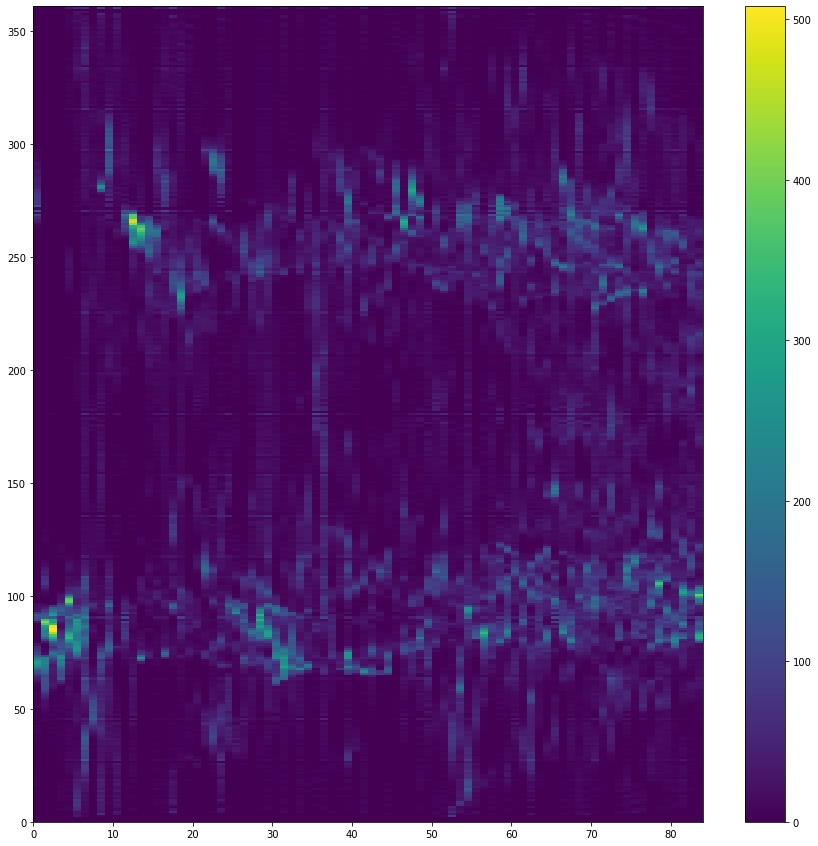

In [33]:
fig, ax = plt.subplots(figsize=(15,15))

ax.pcolormesh(,neuron1_angles.loc[:, 4:])
fig.colorbar(ax.pcolormesh(neuron1_angles.loc[:, 4:]))
plt.savefig('retracted_pixels.pdf')

(11895165, 5)

In [19]:
start, end = image_coor[:,0].min(), image_coor[:,0].max()
final_dist = []
for i in tqdm(np.arange(start,end+1)):
    dist = np.histogram(image_coor[image_coor[:,0] == i][-1], bins=np.linspace(0,361,362))
    final_dist.append(dist[0])


100%|██████████| 86/86 [00:03<00:00, 26.46it/s]


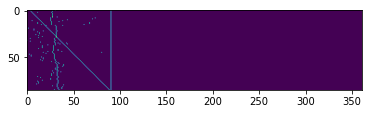

In [20]:
plt.imshow(final_dist)

In [23]:
a = np.zeros((6,2))
b = np.ones((6,1))
a.shape, b.shape

((6, 2), (6, 1))

In [30]:
angles.shape

(11895165,)

In [31]:
angles.reshape(11895165,1).shape

(11895165, 1)

TypeError: 'CClass' object is not callable

In [12]:
angles

array([90.0024431 , 90.00162874, 90.0024431 , ..., 89.97638334,
       89.97801208, 89.97638334])

In [7]:
dot_product = np.dot(image_coor[:,1:], (0,0,1))

In [8]:
angle = np.arccos(dot_product)

<ipython-input-8-4c22974f8905>:1: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(dot_product)


In [10]:
angle[10000:10010]

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 3.14159265])

In [13]:
image_angles = []
for i in image_coor:
    
    ang = analysis.vect_alpha(i[1:], ref=(0,0,1), circ=360)
    image_angles.append(ang)


/Users/aichah/Desktop/TLI/pipeline/steps/utils/analysis.py:124: RuntimeWarning: invalid value encountered in true_divide
  unit_vector_1 = vect / np.linalg.norm(vect)


KeyboardInterrupt: 

In [12]:
image_coor
image_coor.shape

(11895165, 4)